# Personal Project: Prediction of heat in a HX by a neural network 

Normallt , the equation of a HX heat is:
Q=U.A.TLM

This project aim to train a neural network to predict the heat only with the temperatures of gas fluids, thermal coefficient and area as features.

# 1. Creation of the data 

In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Generation of U,A and tempeeratures inside the working interval 

In [11]:
def Heat(U,A,T_hent,Th_sal,T_cent,T_csal):
    """
    This function calculates the heat transfer rate (Q) in a heat exchanger using the 
    Log Mean Temperature Difference (LMTD) method.

    Parameters:
    U : Overall heat transfer coefficient (W/m²K)
    A : Heat transfer area (m²)
    T_hent: Hot fluid inlet temperature (°C)
    Th_sal: Hot fluid outlet temperature (°C)
    T_cent: Cold fluid inlet temperature (°C)
    T_csal: Cold fluid outlet temperature (°C)

    Returns:
    float: Heat transfer rate (Q) in Watts
    """
    Q=np.empty((np.shape(T_hent)[0],np.shape(T_hent)[1]))
    # Calculate temperature differences
    delta_T1 = T_hent - T_csal
    delta_T2 = Th_sal - T_cent
    # Calculate LMTD
    LMTD = np.where(delta_T1==delta_T2, delta_T1, (delta_T1 - delta_T2) / np.log(delta_T1 / delta_T2))
    # Calculate heat transfer rate
    Q = U*A* LMTD
    return Q

In [12]:
U=np.empty((0,500))
A=np.empty((0,500))
T_hent=np.empty((0,500))
Th_sal=np.empty((0,500))
T_cent=np.empty((0,500))
T_csal=np.empty((0,500))
for i in range(500):
    U_line=np.random.uniform(low=10, high=50, size=500)
    A_line=np.random.uniform(low=10, high=500, size=500)
    T_hent_line=np.random.uniform(low=300, high=450, size=500)
    Th_sal_line=np.random.uniform(low=120, high=180, size=500)
    T_cent_line=np.random.uniform(low=25, high=50, size=500)
    T_csal_line=np.random.uniform(low=150, high=300, size=500)
    U=np.vstack([U, U_line])
    A=np.vstack([A, A_line])
    T_hent=np.vstack([T_hent, T_hent_line])
    Th_sal=np.vstack([Th_sal, Th_sal_line])
    T_cent=np.vstack([T_cent, T_cent_line])
    T_csal=np.vstack([T_csal, T_csal_line])
Q= Heat(U,A,T_hent,Th_sal,T_cent,T_csal)

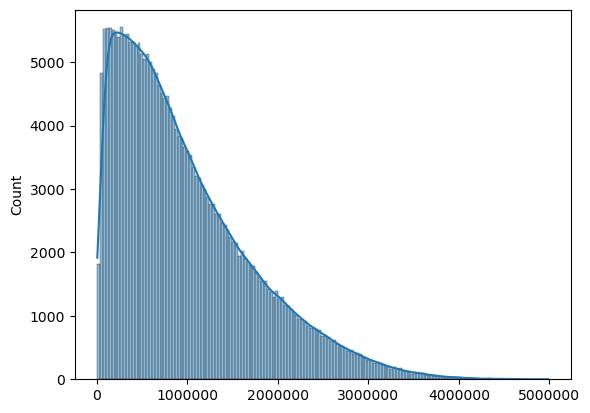

In [18]:
sns.histplot(Q.flatten(), kde=True)
plt.ticklabel_format(style='plain', axis='x')

# Construction of the neural network object and the training and test object.

In [ ]:
import sck
import torch.nn as nn


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self,layers_description,activation_functions):
        super(NeuralNetwork, self).__init__()